
## César Amador Viera Villarreal
## A01283503

Visualización de datos para la toma de decisiones (Gpo 4)
Evaluación Final

Se estará utilizando la base de datos "headbrain" para analizar las siguientes preguntas:

1- ¿Como se distribuyen los datos segun edad y peso?

2- ¿Existen valores atipicos en las variables Head Size(cm^3) y Brain Weight(grams)?

3- ¿Cual ecaución describe la relación entre el peso del cerebro y el tamaño de la cabeza de un infante?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model


df = pd.read_csv('datasets/headbrain.csv')
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


Aqui se encuentran 4 variables, Gender, Age, Head Size y Brain Weight. Estas variables corresponden al genero, edad, tamaño de cabeza y peso del cerebro respectivamente. Todas son variables numericas.


## 1- ¿Como se distribuyen los datos segun edad y peso?
Para responder esto se generaran gráficas de pie para conocer que porcentaje de datos existen según la edad y el genero.

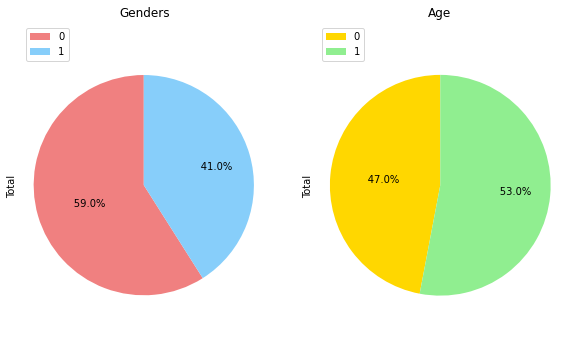

In [2]:
new_df = df.groupby('Gender', axis=0).sum()
new_df['Total'] = new_df.iloc[:,:].sum(axis=1)

fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
color_list = ['lightcoral', 'lightskyblue']
new_df['Total'].plot(kind='pie',
        figsize=(15,6),
        autopct = '%10.1f%%',
        startangle = 90,
        labels = None,
        colors = color_list)

plt.title('Genders')
plt.axis('equal')
plt.legend(labels= df.index,loc = 'upper left')

ax2 = fig.add_subplot(1,3,2)
age_df = df.groupby('Age Range', axis=0).sum()
age_df['Total'] = age_df.iloc[:,:].sum(axis=1)

color_list = ['gold', 'lightgreen']
age_df['Total'].plot(kind='pie',
        figsize=(15,6),
        autopct = '%10.1f%%',
        startangle = 90,
        labels = None,
        colors = color_list)

plt.title('Age')
plt.axis('equal')
plt.legend(labels= df.index,loc = 'upper left')


plt.show()

Se puede generar una tabla pivote para conocer el promedio del tamaño de la cabeza y el peso del cebrero segun el genero

In [3]:
pd.pivot_table(df,
              index='Gender',
              values = ['Brain Weight(grams)', 'Head Size(cm^3)'],
              aggfunc = 'mean')

,Brain Weight(grams),Head Size(cm^3)
Gender,,
1,1331.858209,3798.261194
2,1219.145631,3420.281553


## 2- ¿Existen valores atipicos en las variables Head Size(cm^3) y Brain Weight(grams)?
Se pueden hacer boxplots de las variables Head Size(cm^3) y Brain Weight(grams) para observar si hay datos atipicos.

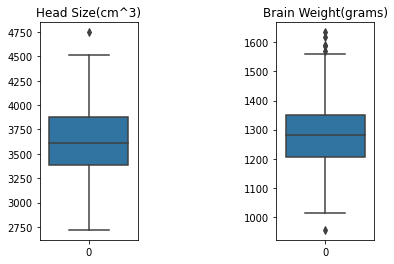

In [4]:
fig = plt.figure()

ax1 = fig.add_subplot(1,3,1)
sns.boxplot(data = df['Head Size(cm^3)'])

ax2 = fig.add_subplot(1,3,3)
sns.boxplot(data = df['Brain Weight(grams)'])

ax1.title.set_text('Head Size(cm^3)')
ax2.title.set_text('Brain Weight(grams)')

plt.show()

De igual forma, se puede generar una tabla dedispersion para ver como se relacionan el peso del cerebro y el tamaño de la 
cabeza.

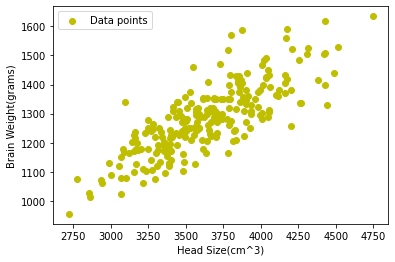

In [5]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

plt.scatter(X, Y,
           c='y',
           label='Data points')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')

plt.legend()
plt.show()

Con estas gráficas se puede observar que si existen algunos valores atípicos en estas variabales.

## 3- ¿Cual ecaución describe la relación entre el peso del cerebro y el tamaño de la cabeza de un infante?
Se puede generar un modelo de regresión para estas variables.

In [6]:
model = sm.OLS.from_formula('Y ~ X', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           5.96e-54
Time:                        12:15:33   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.000     232.701     418.446
X              0.2634      0.013     20.409      0.000       0.238       0.289
==============================================================================
Omnibus:                        8.329   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.665
Skew:                           0.366   Prob(JB):                       0.0131
Kurtosis:                       3.584   Cond. No.                     3.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Por ulitmo podemos comprobar cual modelo de regresión de ajusta de mejor forma a los datos

In [7]:
lm = linear_model.LinearRegression()
X = pd.DataFrame(df['Head Size(cm^3)'])
Y = pd.DataFrame(df['Brain Weight(grams)'])
model_lm=lm.fit(X, Y)
model_lm

LinearRegression()

Con este analisis se pudo observar la naturaleza de los datos y se obtiene la formula de regresion linear la cual sería:
Y = 0.2442*X, donde la "X" representa el tamaño de la cabeza y "Y" el peso del cerebro.